# Lecture 05 - Exercise -  Predict diamond prices

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.shape

(53940, 10)

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
print(diamonds['cut'].unique())
print(diamonds['cut'].unique())
print(diamonds['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [9]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix = 'cut', drop_first = True)],axis = 1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix = 'cut', drop_first = True)],axis = 1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix = 'cut', drop_first = True)],axis = 1)

In [10]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,cut_H,cut_I,cut_J,cut_IF,cut_SI1,cut_SI2,cut_VS1,cut_VS2,cut_VVS1,cut_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,1,0,0,0,0


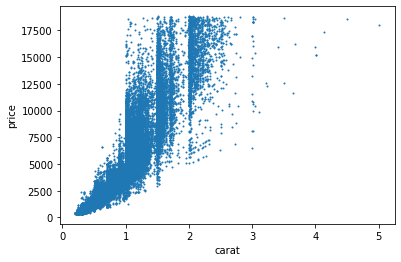

In [12]:
#plotta för att se hur det ser  ut

diamonds.plot.scatter(x = 'carat', y = 'price', s = 1);

### Time for some prediction

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
target_name = 'price'
x = diamonds.drop('price', axis = 1)
y = diamonds[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

### Create DF to store result in later

In [16]:
models = pd.DataFrame(index = ['train_mse', 'test_mse'], 
                        columns = ['NULL', 'MLR', 'KNN', 'LASSO'])